# Correlation, regression, and prediction

_Adapted from [Psych 167AC module](https://github.com/ds-modules/PSYCH-167AC)_

One of the most important and interesting aspects of data science is making predictions about the future. How can we learn about temperatures a few decades from now by analyzing historical data about climate change and pollution? Based on a person's social media profile, what conclusions can we draw about their interests? How can we use a patient's medical history to judge how well he or she will respond to a treatment?

Run the cell below to import the code we'll use in this notebook.
Don't worry about getting an output, simply run the cell.

In [17]:
library(ggplot2)
restore = list(repr.plot.width=4, repr.plot.height=3.5)
options(restore)

In this module, you will look at two **correlated** phenomena and predict unseen data points!

We will be using data from the online data archive of Prof. Larry Winner of the University of Florida. The file *hybrid* contains data on hybrid passenger cars sold in the United States from 1997 to 2013. In order to analyze the data, we must first **import** it to our Jupyter notebook and **create a table.**

In [7]:
hybrid = read.csv("hybrid.csv")
head(hybrid)

vehicle,year,msrp,acceleration,mpg,class
<fct>,<int>,<dbl>,<dbl>,<dbl>,<fct>
Prius (1st Gen),1997,24509.74,7.46,41.26,Compact
Tino,2000,35354.97,8.20,54.10,Compact
Prius (2nd Gen),2000,26832.25,7.97,45.23,Compact
Insight,2000,18936.41,9.52,53.00,Two Seater
Civic (1st Gen),2001,25833.38,7.04,47.04,Compact
Insight,2001,19036.71,9.52,53.00,Two Seater


*References: vehicle: model of the car, year: year of manufacture, msrp: manufacturer's suggested retail price in 2013 dollars, acceleration: acceleration rate in km per hour per second, mpg: fuel economy in miles per gallon, class: the model's class.*

**Note: whenever we write an equal sign (=) in python, we are assigning somthing to a variable.**

Let's visualize some of the data to see if we can spot a possible association!

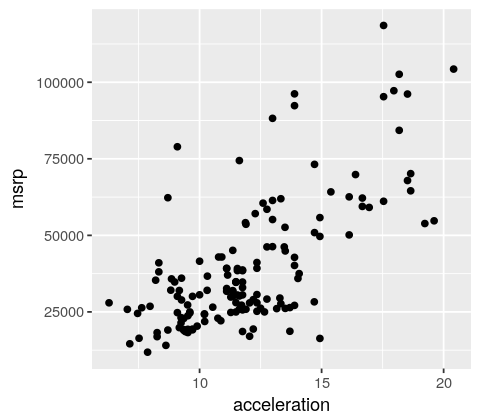

In [18]:
ggplot(hybrid) +
    geom_point(aes(x=acceleration, y=msrp))

As we can see in the above scatter, there seems to be a positive association between acceleration and price. That is, cars with greater acceleration tend to cost more, on average; conversely, cars that cost more tend to have greater acceleration on average.

What about miles per gallon and price? Do you expect a positive or negative association?

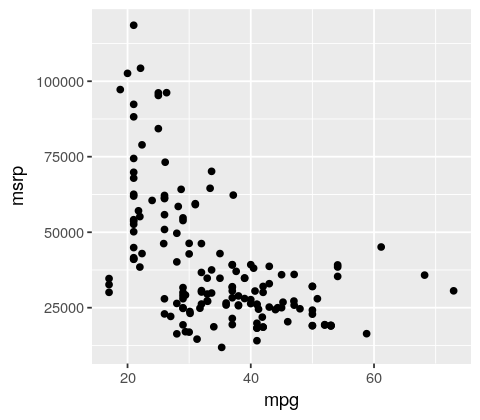

In [19]:
ggplot(hybrid) +
    geom_point(aes(x=mpg, y=msrp))

Along with the negative association, the scatter diagram of price versus efficiency shows a **non-linear relation** between the two variables, i.e., the points appear to be clustered around a curve, not around a straight line.

Let's subset the data so that we're only looking at SUVs. Use what you learned in the previous notebook to choose only `SUV`s and then make a scatter plot of `mpg` and `msrp`:

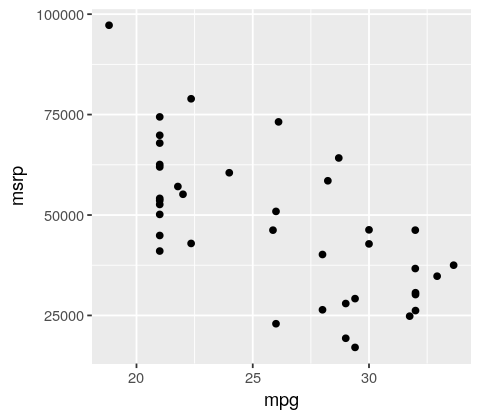

In [61]:
ggplot(hybrid[hybrid$class == "SUV",]) +
    geom_point(aes(x=mpg, y=msrp))

---

### The correlation coefficient - $r$

> The correlation coefficient ranges from −1 to 1. A value of 1 implies that a linear equation describes the relationship between X and Y perfectly, with all data points lying on a line for which Y increases as X increases. A value of −1 implies that all data points lie on a line for which Y decreases as X increases. A value of 0 implies that there is no linear correlation between the variables. ~Wikipedia

$r$ = 1: the scatter diagram is a perfect straight line sloping upwards

$r$ = -1: the scatter diagram is a perfect straight line sloping downwards.

Let's calculate the correlation coefficient between acceleration and price. We can use the `cor` function on the two variable (columns here) that we want to correlate:

In [20]:
cor(hybrid$acceleration, hybrid$msrp)

[1] 0.6955779

---

### Regression

As mentioned earlier, an important tool in data science is to make predictions based on data. The code that we've created so far has helped us establish a relationship between our two variables. Once a relationship has been established, it's time to create a model that predicts unseen data values. To do this we'll find the equation of the **regression line**!

The regression line is the **best fit** line for our data. It’s like an average of where all the points line up. In linear regression, the regression line is a perfectly straight line! Below is a picture showing the best fit line.

![image](http://onlinestatbook.com/2/regression/graphics/gpa.jpg)

As you can infer from the picture, once we find the **slope** and the **y-intercept** we can start predicting values! The equation for the above regression to predict university GPA based on high school GPA would look like this:

$UNIGPA_i= \alpha + \beta HSGPA + \epsilon_i$

The variable we want to predict (or model) is the left side `y` variable, the variable which we think has an influence on our left side variable is on the right side. The $\alpha$ term is the y-intercept and the $\epsilon_i$ describes the randomness.

We can fit the model by setting up an equation without the $\alpha$ and $\epsilon_i$ in the `formula` parameter of the function below, we'll give it our data variable in the `data` parameter. We'll try a model for:

$MSRP_i= \alpha + \beta ACCELERATION + \epsilon_i$

In [1]:
mod = lm(msrp ~ acceleration, data=hybrid)
summary(mod)

ERROR: Error in is.data.frame(data): object 'hybrid' not found


That's a lot of information! While we should consider everything, we'll look at the `p` value, the `coef`, and the `R-squared`. A p-value of < .05 is generally considered to be statistically significant. The `coef` is how much increase one sees in the left side variable for a one unit increase of the right side variable. So for a 1 unit increase in acceleration one might see an increase of $5067 MSRP, according to our model. But how great is our model? That's the `R-squared`. The `R-squared` tells us how much of the variation in the data can be explained by our model, .484 isn't that bad, but obviously more goes into the MSRP value of a car than *just* acceleration.

We can plot this line of "best fit" too:

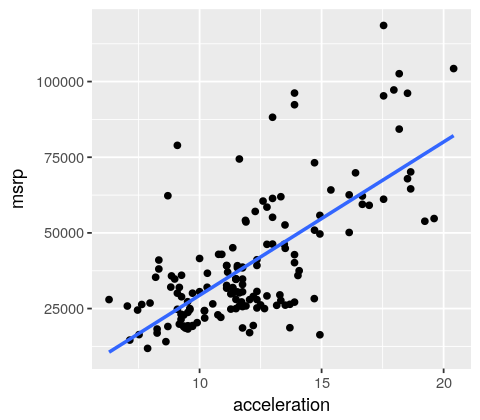

In [54]:
ggplot(hybrid, aes(x=acceleration, y=msrp)) +
    geom_point() +
    geom_smooth(method="lm", level=0)

#### Covariate

We might want to add another independent variable because we think it could influence our dependent variable. If we think `mpg` could have an influence and needs to be controlled for we just `+` add that to the equation. (NB: the example below would exhibit high [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity))

$MSRP_i= \alpha + \beta ACCELERATION + \beta MPG + \epsilon_i$

In [44]:
mod.2 = lm(msrp ~ acceleration + mpg, data = hybrid)
summary(mod.2)


Call:
lm(formula = msrp ~ acceleration + mpg, data = hybrid)

Residuals:
   Min     1Q Median     3Q    Max 
-38594  -9073  -2244   7028  49402 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5796.5     8861.2   0.654 0.514019    
acceleration   4176.4      474.2   8.807 2.91e-15 ***
mpg            -471.9      127.1  -3.714 0.000287 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14830 on 150 degrees of freedom
Multiple R-squared:  0.5273,	Adjusted R-squared:  0.521 
F-statistic: 83.66 on 2 and 150 DF,  p-value: < 2.2e-16


---

We are going to walk through a brief example using the datasets that you will using. You will not be allowed to use this correlation for your project. However, the process for your project will be the same. Our goal is to make the project as seamless as possible for you. That being said, our example will be abbreviated so that you have some freedom to explore with your own data.

First we are going to read in two datasets.

`Implicit-Age-IAT.csv` gives us the implicit *age* bias according to FIPS code.

In [46]:
age = read.csv("Implicit-Age_IAT.csv")
head(age)

FIPS,tyoung,told,D_biep_Young_Good_all
<int>,<dbl>,<dbl>,<dbl>
10001,7.137821,7.173633,0.4626620
10003,7.077230,6.882745,0.4397008
10005,6.848315,6.960894,0.4459575
1001,7.050847,6.796610,0.5028144
1003,7.179039,7.041485,0.4573694
1005,7.285714,6.971429,0.3809695


`Outcome-Heart-Attack-Mortality.csv` gives us the heart attack mortality count by year according to FIPS code.

In [47]:
heart = read.csv("Outcome-Heart-Attack-Mortality.csv")
head(heart)

State,FIPS,County,Year,Heart_Attack_Mortality,Stability
<fct>,<int>,<fct>,<int>,<dbl>,<int>
Alabama,1001,Autauga,2000,220.8,1
Alabama,1001,Autauga,2001,100.7,1
Alabama,1001,Autauga,2002,68.2,1
Alabama,1001,Autauga,2003,66.7,1
Alabama,1001,Autauga,2005,63.2,1
Alabama,1001,Autauga,2006,68.3,1


Keep in mind that all the functions/syntax that we are using are either in this notebook, or the previous one from lecture.

Now, we are going to join the two tables together. We will be joining on the 'FIPS' column because that's the only one they have in common! That column is a unique identifier for counties. We are also going to drop duplicate rows from the table.

In [49]:
joined_data = merge(age, heart, by="FIPS")
head(joined_data)

FIPS,tyoung,told,D_biep_Young_Good_all,State,County,Year,Heart_Attack_Mortality,Stability
<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<int>,<dbl>,<int>
1001,7.050847,6.79661,0.5028144,Alabama,Autauga,2001,100.7,1
1001,7.050847,6.79661,0.5028144,Alabama,Autauga,2011,88.5,1
1001,7.050847,6.79661,0.5028144,Alabama,Autauga,2013,84.7,1
1001,7.050847,6.79661,0.5028144,Alabama,Autauga,2000,220.8,1
1001,7.050847,6.79661,0.5028144,Alabama,Autauga,2014,144.8,1
1001,7.050847,6.79661,0.5028144,Alabama,Autauga,2012,33.9,0


That's great! By displaying the table, we can get a general idea as to what columns exist, and what kind of relations we can try to analyze. 

One thing to notice is that there are a lot of data points! Our visualization and regression may be cleaner if we subset the data. Let's use the functions from the first notebook to subset the data to California data from 2010.

In [50]:
joined_data = joined_data[joined_data$Year == 2010,]
joined_data = joined_data[joined_data$State == "California",]
head(joined_data)

,FIPS,tyoung,told,D_biep_Young_Good_all,State,County,Year,Heart_Attack_Mortality,Stability
,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<int>,<dbl>,<int>
2274,6001,6.960689,6.788260,0.4230264,California,Alameda,2010,45.8,1
2299,6005,6.575000,6.850000,0.4463566,California,Amador,2010,78.6,1
2314,6007,7.118924,7.046957,0.4421568,California,Butte,2010,62.7,1
2334,6009,7.650794,7.825397,0.4608068,California,Calaveras,2010,99.5,1
2339,6013,6.961881,6.876549,0.4185063,California,Contra Costa,2010,48.9,1
2365,6015,7.000000,6.838710,0.4326595,California,Del Norte,2010,75.8,1


We now have a lot less points, which will hopefully make the visualization a bit cleaner.

Let's make a simple scatter plot with a fit line to look at the relation between the category `D_biep_Young_Good_all` and `Heart_Attack_Mortality`. Remember, all these functions are either on Notebook 1 or Notebook 2!

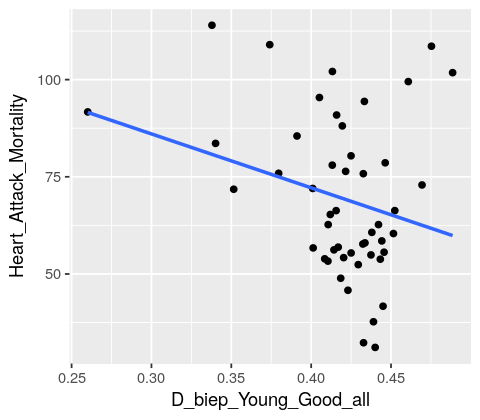

In [53]:
ggplot(joined_data, aes(x=D_biep_Young_Good_all, y=Heart_Attack_Mortality)) +
    geom_point() +
    geom_smooth(method="lm", level=0)

As we can see, the correlation and subsequent linear fit do not seem to be good. That means that there is not an easily quantifiable relationship between implicit age bias and the heart attack mortality rate for that geographic region.

Let's verify this quantitatively with an r-value calculation!

In [55]:
cor(joined_data$D_biep_Young_Good_all, joined_data$Heart_Attack_Mortality)

[1] -0.2566593

Our r-value is moderately negative, so we would *not* reject the null hypothesis and call this "significant". This indicates little to no correlation, similar to what our scatter plot predicited. 

Let us display a regression summary, just for practice!

In [58]:
mod.3 = lm(Heart_Attack_Mortality ~ D_biep_Young_Good_all, data=joined_data)
summary(mod.3)


Call:
lm(formula = Heart_Attack_Mortality ~ D_biep_Young_Good_all, 
    data = joined_data)

Residuals:
   Min     1Q Median     3Q    Max 
-35.51 -13.29  -4.62  11.70  46.88 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             127.65      32.07   3.981 0.000237 ***
D_biep_Young_Good_all  -138.72      76.19  -1.821 0.075045 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.06 on 47 degrees of freedom
Multiple R-squared:  0.06587,	Adjusted R-squared:  0.046 
F-statistic: 3.314 on 1 and 47 DF,  p-value: 0.07505


A quick scan above shows an extremeley low R-squared and a high p-value, both of which imply that our model does not fit the data very well at all.

That's it! By working through this module, you've learned how to **visually analyze your data**, **establish a correlation** by calculating the **correlation coefficient**, **set up a regression (with a covariate)**, and **find the regression line**!